Edit this file and write your solutions to the problems in sections specified with `# Your solution goes here`.

# Analyzing Chicken and Eggs
The goal of this assignment is to recreate the analysis of the chicken and eggs data set presented in this video:  
https://www.youtube.com/watch?v=j6ClFJhnG18

Watch the video. The first half is about visualization in general, the chicken and egg analysis starts at about 9:50. Note that the author uses R rather than Python.

The data set is unfortunately not available, so I have created one, saved as `chicken.csv`. There are differences in the numbers, but the character should be the same.

In A. Analysis below, the different analysis steps are prepared for you. For all plots, you are asked to produce the plot first with Pandas.plot() and then with Seaborn. Section B. Reflection asks you to think about both of these ways of plotting and which you prefer for what cases. Your oppinion is thought after.

Section C. is optional.
     

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set styling
plt.style.use(style="dark_background")
plt.rcParams['font.size'] = 12
plt.rcParams['grid.alpha'] = 0.3

## A. Analyzing the data

### 0. read in the data 

In [3]:
# Your solution goes here
data = pd.read_csv('chicken.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   week    360 non-null    int64  
 1   age     360 non-null    int64  
 2   diet    360 non-null    object 
 3   weight  360 non-null    float64
 4   eggs    360 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 14.2+ KB


### 1. Weight by diet summary stats (Pandas groupby and describe)

In [20]:
# Your solution goes here
data.groupby(by='diet')['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
diet,,,,,,,,
A,120.0,3634.852500,447.654043,2683.9,3284.250,3601.10,3952.375,4845.0
B,120.0,3351.299167,316.871704,2690.3,3122.175,3333.55,3590.400,4057.6
C,120.0,3415.831667,449.476292,2383.3,3114.500,3417.85,3731.375,4508.7


### 2. Eggs by diet summary stats (Pandas groupby and describe)

In [21]:
# Your solution goes here
data.groupby(by='diet')['eggs'].describe()

,count,mean,std,min,25%,50%,75%,max
diet,,,,,,,,
A,120.0,4.483333,0.501817,4.0,4.0,4.0,5.0,5.0
B,120.0,4.033333,0.709282,3.0,4.0,4.0,5.0,5.0
C,120.0,4.175000,0.706066,3.0,4.0,4.0,5.0,5.0


### 3.1 Histogram of age of chickens (Pandas hist())

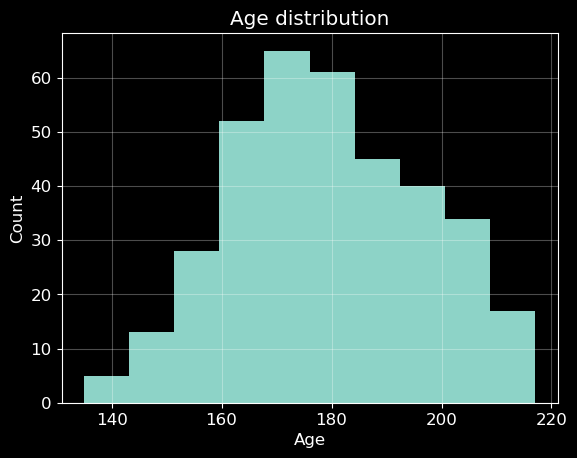

In [28]:
# Your solution goes here
data.hist(column='age');
plt.title('Age distribution');
plt.xlabel('Age');
plt.ylabel('Count');

### 3.2 Histogram of age of chickens (Seaborn distplot())

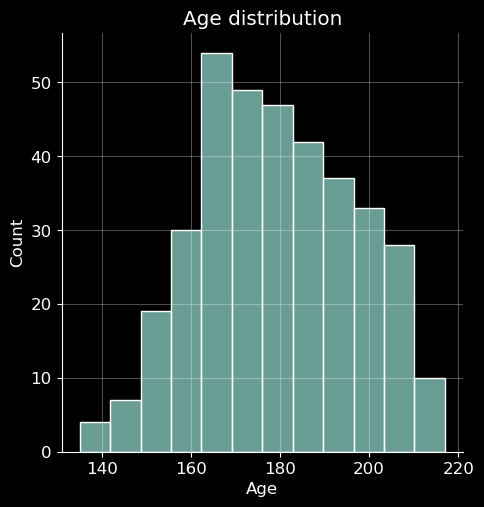

In [30]:
# Your solution goes here
sns.displot(data['age']);
plt.title('Age distribution');
plt.xlabel('Age');
plt.ylabel('Count');
plt.grid(alpha=0.3);

### 4.1 Boxplot age (Pandas boxplot())

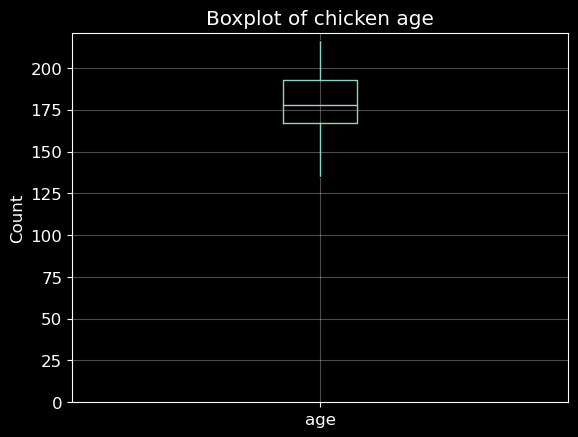

In [47]:
# Your solution goes here
f, ax = plt.subplots(1)
data.boxplot(column='age', ax=ax);
plt.ylim(ymin=0) # Setting y limit to start from 0
plt.title('Boxplot of chicken age');
plt.ylabel('Count');

### 4.2 Boxplot age (Seaborn boxplot())

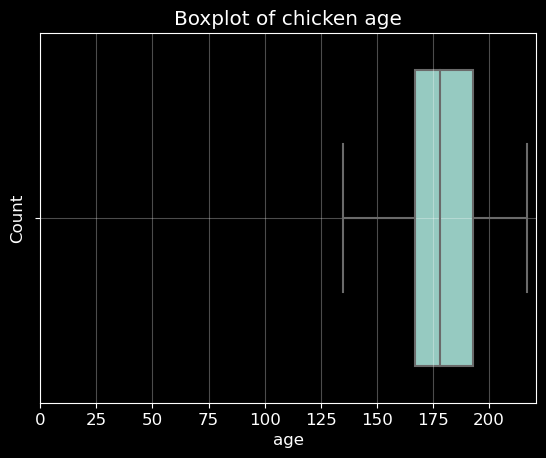

In [48]:
# Your solution goes here
sns.boxplot(x='age', data=data)
plt.xlim(xmin=0) # Setting x limit to start from 0
plt.title('Boxplot of chicken age');
plt.ylabel('Count');
plt.grid(alpha=0.3);

### 5.1 Plot average weight vs weeks by diet (Pandas plot() on groupby()) 
Hint: groupby week and diet, calculate mean, get the weight colum, unstack and plot  
see here for more details:  
https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html

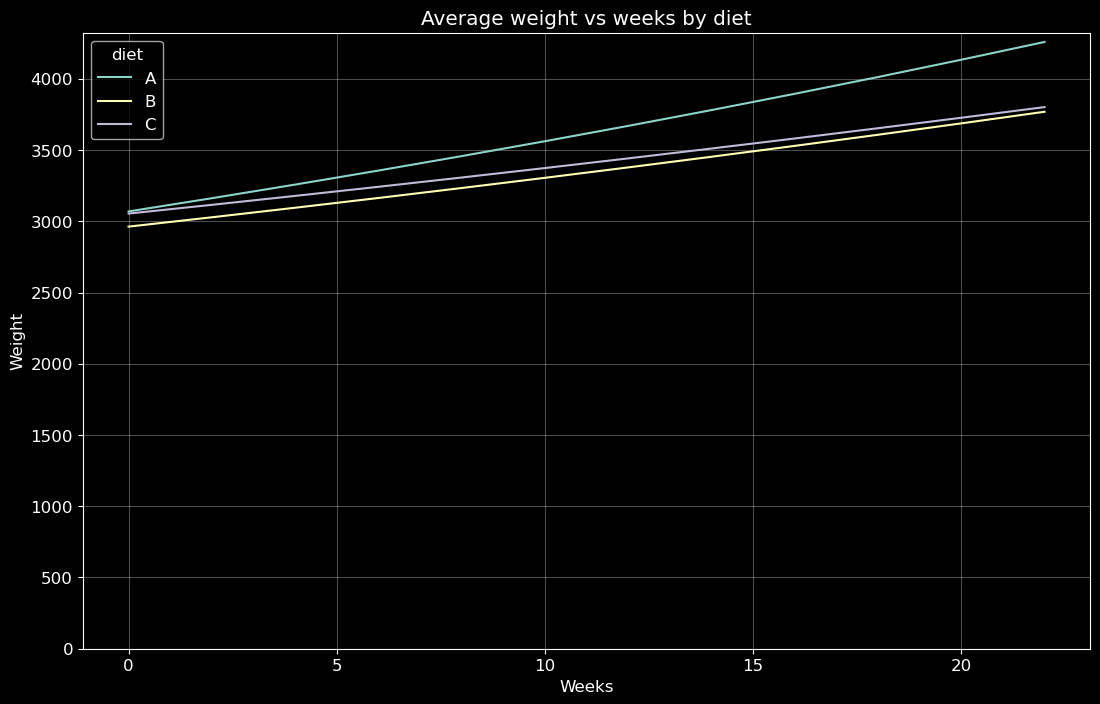

In [7]:
# Your solution goes here
fig, ax = plt.subplots(figsize=(13,8))
data.groupby(by=['week', 'diet']).mean()['weight'].unstack().plot(ax=ax);
plt.ylim(ymin=0) # Setting y limit to start from 0
plt.title('Average weight vs weeks by diet');
plt.xlabel('Weeks');
plt.ylabel('Weight');
plt.grid(alpha=0.3);

### 5.2 Plot average weight vs weeks by diet (Seaborn pointplot()) 
Hint: set `ci=None` to not get error bars

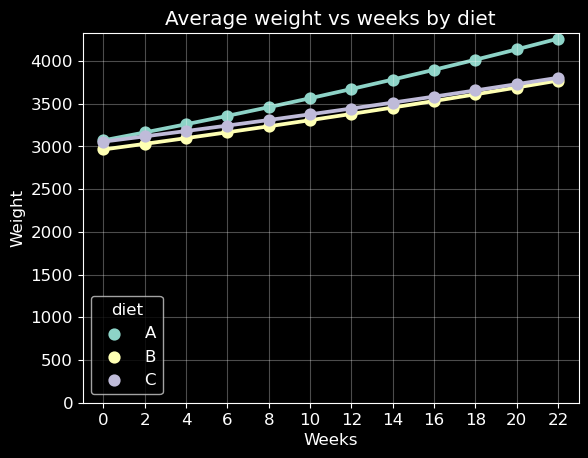

In [8]:
# Your solution goes here
sns.pointplot(x='week', y='weight', hue='diet', data=data, ci=None);
plt.ylim(ymin=0) # Setting y limit to start from 0
plt.title('Average weight vs weeks by diet');
plt.xlabel('Weeks');
plt.ylabel('Weight');
plt.grid(alpha=0.3);

### 6.1 Plot average eggs vs weeks by diet (Pandas plot() on groupby()) 
Hint: It might be good to start y axis at 0

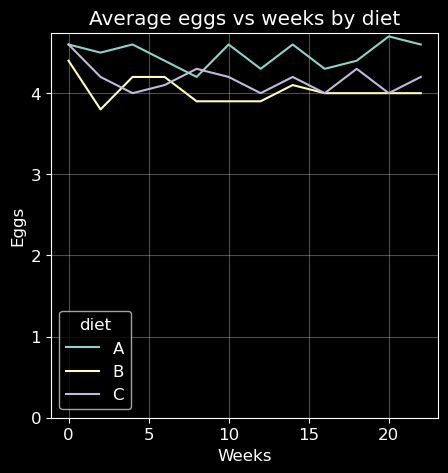

In [6]:
# Your solution goes here
fig, ax = plt.subplots(figsize=(5,5))
data.groupby(by=['week', 'diet']).mean()['eggs'].unstack().plot(ax=ax);\
plt.ylim(ymin=0) # Setting y limit to start from 0
plt.title('Average eggs vs weeks by diet');
plt.xlabel('Weeks');
plt.ylabel('Eggs');
plt.grid(alpha=0.3);

### 6.2 plot average eggs vs weeks by diet (Seaborn pointplot()) 
Hint: It might be good to start y axis at 0

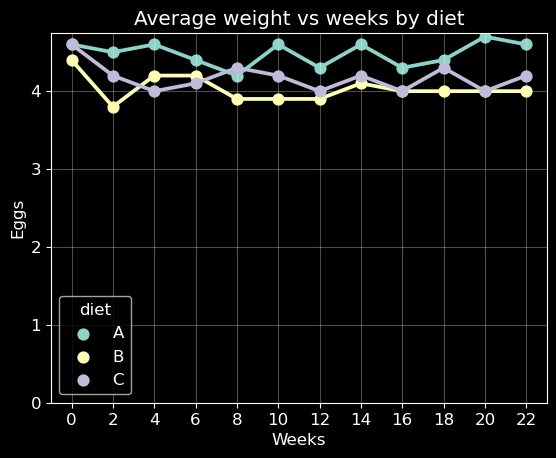

In [11]:
# Your solution goes here
sns.pointplot(x='week', y='eggs', hue='diet', data=data, ci=None);
plt.ylim(ymin=0)  # Setting y limit to start from 0
plt.title('Average weight vs weeks by diet')
plt.xlabel('Weeks')
plt.ylabel('Eggs')
plt.grid(alpha=0.3)

### 7. Average age by diet stats (Pandas groupby())

In [41]:
# Your solution goes here
data.groupby(by='diet')['age'].mean()

diet
A    166.5
B    187.9
C    183.4
Name: age, dtype: float64

### 8.1 Scatter plot eggs vs age by diet (Pandas plot.scatter())
Hint: You need to loop over the diet 'A', 'B', 'C' and plot each seperatly in the same axes. Use `ax=plt.gca()` to get repeated plots to appear in the same axes. For more info, have a look at the following thread:  
https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib


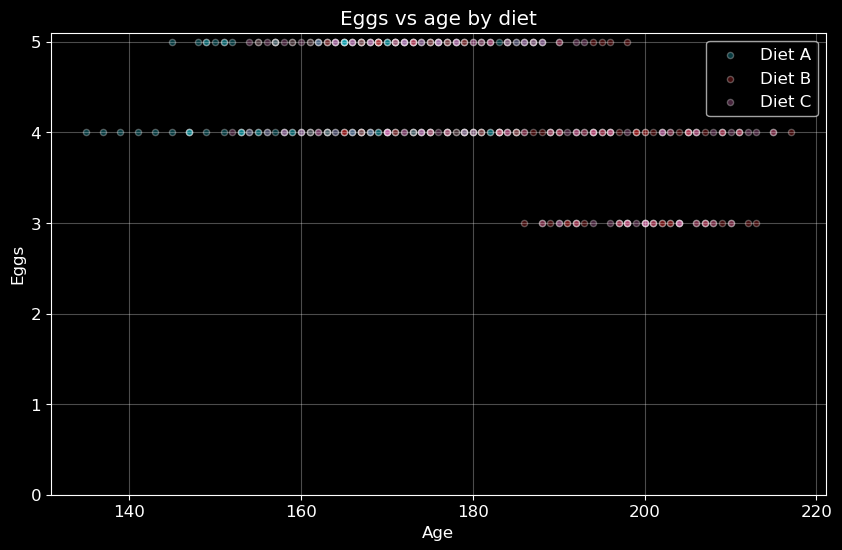

In [61]:
# Your solution goes here
# Create a scatter plot of mpg vs. horsepower and compare it with origin to find correlation
colors = {'A': 'tab:cyan', 'B': 'tab:red', 'C': 'tab:pink'}
plt.rcParams['figure.figsize'] = (10, 6)
fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)
for key, group  in data.groupby('diet'):
    group.plot.scatter(x='age', y='eggs', ax=ax, label='Diet '+str(key), title='Eggs vs age by diet', c=colors[key], alpha=0.3, edgecolors='white');

plt.ylim(ymin=0) # Setting y limit to start from 0
plt.xlabel('Age');
plt.ylabel('Eggs');
plt.grid(alpha=0.3);

### 8.2 Scatter plot eggs vs age by diet (Seaborn scatterplot()) 


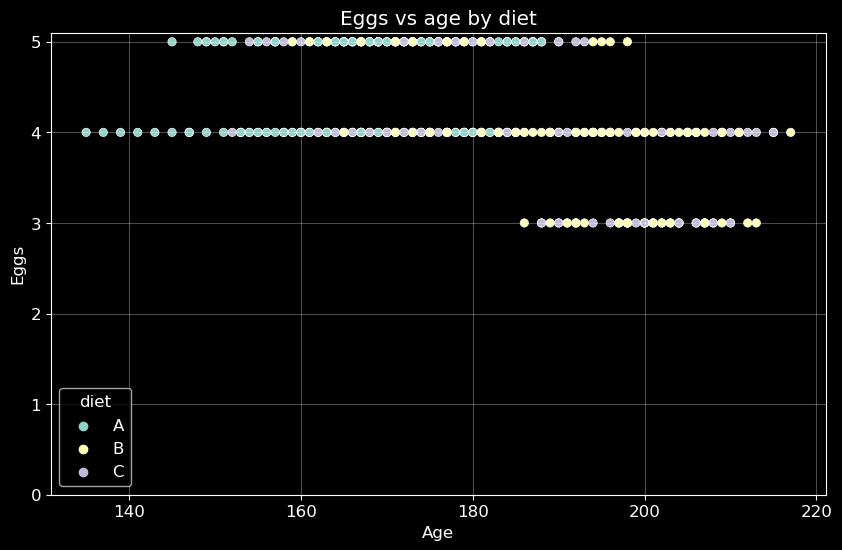

In [66]:
# Your solution goes here

# Set styling
plt.rcParams['grid.alpha'] = 0.7
pallet = {1: 'tab:cyan', 2: 'tab:red', 3: 'tab:pink'}
sns.scatterplot(data=data, x="age", y="eggs", hue="diet");
plt.title('Eggs vs age by diet')
plt.ylim(ymin=0) # Setting y limit to start from 0
plt.xlabel('Age');
plt.ylabel('Eggs');
plt.grid(alpha=0.3);

### 9.1 Boxplot age by diet (Pandas boxplot())

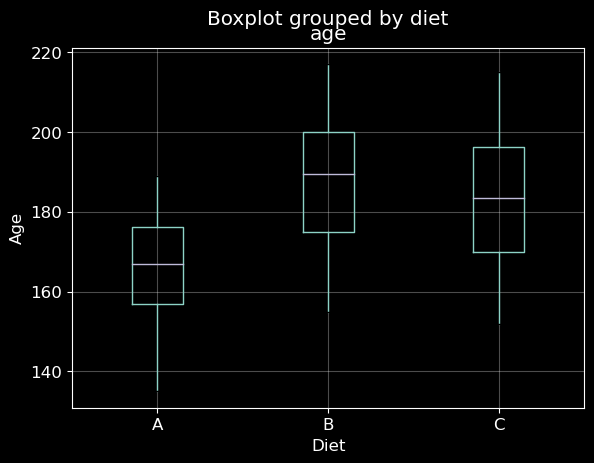

In [30]:
# Your solution goes here
data.boxplot(column='age', by='diet');
plt.ylabel('Age');
plt.xlabel('Diet');
plt.grid(alpha=0.3);


### 9.2 Boxplot age by diet (Seaborn boxplot())

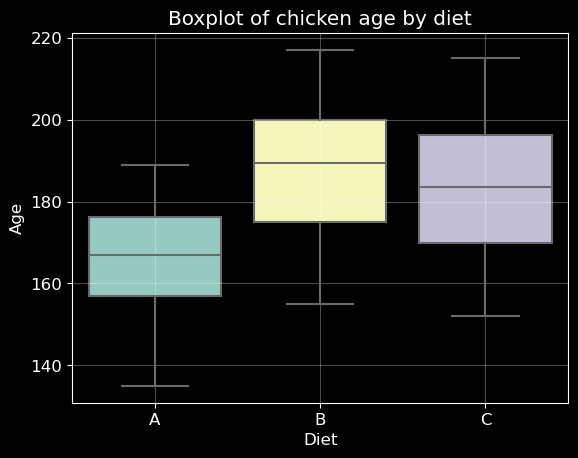

In [32]:
# Your solution goes here
sns.boxplot(x='diet', y='age', data=data);
plt.title('Boxplot of chicken age by diet');
plt.ylabel('Age');
plt.xlabel('Diet');
plt.grid(alpha=0.3);

## B. Reflection
After plotting with Pandas and Seaborn, in your opinion:
1. What are the strengths/weaknesses of Pandas?

The strength of Pandas is that we can easily manipulate and restructure data using functionalities such as the `groupby()` method. However, Pandas is limited in the functionality it provides for visualization, so it may be required to use a different library (like Seaborn) based on how advanced you want your visualizations to be.


2. What are the strengths/weaknesses of Seaborn?

Seaborn creates very visually appealing graphs with very little code required. It also allows for high degree of control on the plots as well. One weakness of Seaborn is that it requires data to already be in array form. This requires us to process the data before we proceed with the visualization.

3. When would you use Pandas and when seaborn?

Pandas can be used when we need to plot something quick and easy or if we are dealing with complex data that requires processing. If we want greater control over the plot, Seaborn offers more functionality in terms of data visualization but requires our data to be processed in array-type form before we can plot it.

**Your answers can go here:**








## C. (optional) Create your own chicken data set using pandas and numpy
You need 3 groups (A, B, C), a time in weeks, individuals are chickens with a certain age in weeks, their weight is roughly the same in each of the groups at the start of the experiment and increases, differently for diets, and they lay eggs.

Young chickens generally lay more eggs.
One group will have more young chickens.

In [ ]:
# Your solution goes here